# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

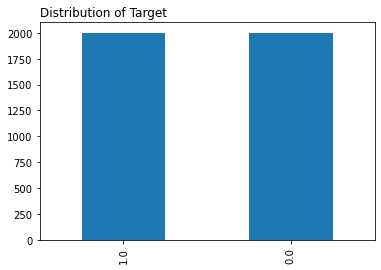

In [4]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


encoder = OneHotEncoder(drop='first')
X_train_encoded = encoder.fit_transform(X_train[['var0','var1','var2']])
X_test_encoded = encoder.transform(X_test[['var0','var1','var2']])


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(['var0','var1','var2'],axis=1).values)
X_test_scaled = scaler.transform(X_test.drop(['var0','var1','var2'],axis=1).values)


In [7]:
X_train_processed = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_train_encoded.toarray())], axis=1)
X_test_processed = pd.concat([pd.DataFrame(X_test_scaled), pd.DataFrame(X_test_encoded.toarray())], axis=1)


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

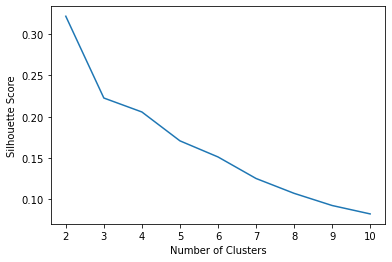

Completeness Score: 0.330
Homogeneity Score: 0.648


In [8]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_processed)
    score = silhouette_score(X_train_processed, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the initialization method
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Run the k-means algorithm
kmeans.fit(X_train_processed)

# Evaluate the clusters
from sklearn.metrics import completeness_score, homogeneity_score

completeness = completeness_score(y_train, kmeans.labels_)
homogeneity = homogeneity_score(y_train, kmeans.labels_)

print(f'Completeness Score: {completeness:.3f}')
print(f'Homogeneity Score: {homogeneity:.3f}')

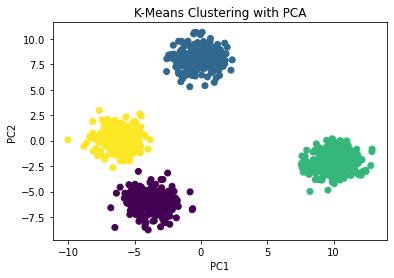

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# generate sample data
X, y = make_blobs(n_samples=1000, centers=4, random_state=42)

# perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# perform PCA on the data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# plot the results
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels)
plt.title('K-Means Clustering with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


- From the plot Silhouette_Score Vs Number_of_Clusters the optimal clusters are 4
- When the K-means is integrated with PCA the each of these clusters look different from each other when cluster value is 4

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [10]:
model = LogisticRegression()
model.fit(X_train_processed, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.931


In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
     'C'       : np.logspace(-3,3,7),
    'solver': ['liblinear']
             }
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_processed, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [13]:
print("Best Score:",grid_search.best_score_)
print('Best Params:',grid_search.best_params_)

Best Score: 0.9421875
Best Params: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


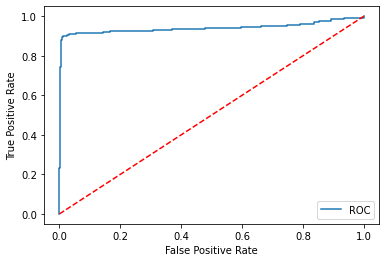

In [14]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Generate predicted class probabilities
y_prob = grid_search.predict_proba(X_test_processed)[:,1]

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr,label='ROC')

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='r')

# Set plot labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [15]:
from sklearn.metrics import classification_report
print('Scores on Testing Data\n')
predictions_test = grid_search.predict(X_test_processed)
testing_score_2 = classification_report(y_test, predictions_test)
print(testing_score_2)

Scores on Testing Data

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.86      0.92       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



- Orginal Logestic regression is has performed well with accuracy of 93 and it is good choise to consider accuracy as metric to measure performance of model since the dataset is balanced 
- The area under the RoC currve is also good

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [16]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Create a pipeline with PCA and logistic regression
pipeline = Pipeline([
    ('pca', PCA()),  # Use PCA to reduce the dimensionality of the input
    ('lr', LogisticRegression())  # Use logistic regression to make predictions
])


In [17]:
param_grid = {
    'pca__n_components': [2, 5, 10,],  # Number of components to use in PCA
    'lr__C': [0.1, 1, 10]  # Regularization strengths for logistic regression
}
grid_search_3 = GridSearchCV(pipeline, param_grid, cv=5,)


grid_search_3.fit(X_train_processed, y_train)


print(f'Best parameters: {grid_search_3.best_params_}')
print(f'Best score: {grid_search_3.best_score_:.4f}')

Best parameters: {'lr__C': 10, 'pca__n_components': 10}
Best score: 0.9503


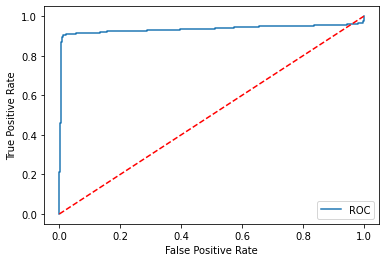

In [18]:
y_prob = grid_search_3.predict_proba(X_test_processed)[:,1]

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr,label='ROC')

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='r')

# Set plot labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [19]:
print('Scores on Testing Data\n')
predictions_test = grid_search_3.predict(X_test_processed)
testing_score_3 = classification_report(y_test, predictions_test)
print(testing_score_3)

Scores on Testing Data

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.94       394
         1.0       0.99      0.87      0.93       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



- There are no major changes between the orginal Logestic regression and the one integrated with PCA.
- Area under ROC is slightly lesser than the ROC of orginal logestic model 

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [20]:
pipeline = Pipeline([
    ('kmeans', KMeans()),
    ('lr', LogisticRegression(max_iter=1000))
])


pipeline.fit(X_train_processed, y_train)

Pipeline(steps=[('kmeans', KMeans()),
                ('lr', LogisticRegression(max_iter=1000))])

In [21]:
param_grid = {
    'kmeans__n_clusters': [2, 5, 10],  # Number of components to use in PCA
    'lr__C': [0.1, 1, 10]  # Regularization strengths for logistic regression
}
grid_search_4 = GridSearchCV(pipeline, param_grid, cv=5,)


grid_search_4.fit(X_train_processed, y_train)


print(f'Best parameters: {grid_search_4.best_params_}')
print(f'Best score: {grid_search_4.best_score_:.4f}')

Best parameters: {'kmeans__n_clusters': 5, 'lr__C': 1}
Best score: 0.9550


In [22]:
print('Scores on Testing Data\n')
predictions_test = grid_search_4.predict(X_test_processed)
testing_score_4 = classification_report(y_test, predictions_test)
print(testing_score_4)

Scores on Testing Data

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       394
         1.0       0.99      0.90      0.94       406

    accuracy                           0.94       800
   macro avg       0.95      0.95      0.94       800
weighted avg       0.95      0.94      0.94       800



- Integrating logestic model with K means preprocessing step has given better performance than model integrated with PCA
- The model has also given better recall and precission scores comparitative to other models

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

- Logestic Model with k-means clustering has given highest scores among all other models.

In [23]:
print('Scores of Orginal Logestic Model:')
print(testing_score_2)

print('\nScores with Logestic Model integrated with PCA:')
print(testing_score_3)

print('\nScores with Logestic Model integrated with K-means:')
print(testing_score_4)

Scores of Orginal Logestic Model:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.86      0.92       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800


Scores with Logestic Model integrated with PCA:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.94       394
         1.0       0.99      0.87      0.93       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800


Scores with Logestic Model integrated with K-means:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       394
         1.0       0.99      0.90      0.94       406

    accuracy                           0.94   

- The logestic model with K means preprocessing step has given better performance than all other models